<a href="https://colab.research.google.com/github/agustinLapi/MachineLearning/blob/main/ML_TP1_Ej2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# Generamos un dataset de dos clases (desbalanceadas en un 40:60)

#X, y = make_classification(n_samples=100, n_classes=2, random_state=1, flip_y=0)

X, y = make_classification(n_samples=50, n_classes=2, weights=[0.40,0.60], random_state=1, flip_y=0)

X_mean, X_std = X.mean(), X.std()
print("X mean:{} std:{}".format(X_mean, X_std))
y_mean, y_std = y.mean(), y.std()
print("y mean:{} std:{}".format(y_mean, y_std))



X mean:0.03134485667251397 std:1.031566188140402
y mean:0.6 std:0.4898979485566356


Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.812


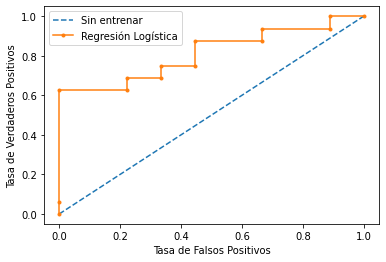

In [3]:
# Dividimos en training y test
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(testy))]
# Entrenamos nuestro modelo de reg log
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# Predecimos las probabilidades
lr_probs = model.predict_proba(testX)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()
